In [284]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [285]:
os.chdir(r'C:\Users\prasa\OneDrive\Desktop\ZS_19')

In [286]:
os.listdir()

['data.csv', 'sample_submission.csv', 'test1', 'test1.csv', '__MACOSX']

In [287]:
dataset = pd.read_csv('data.csv')

In [288]:
dataset.shape

(30697, 28)

In [289]:
dataset.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [290]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
Unnamed: 0               30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-n

In [291]:
data1=dataset.copy()

In [292]:
data1.rename(columns={'shot_id_number':'shot_id_number1'},inplace=True)
data1.rename(columns={'Unnamed: 0':'shot_id_number'},inplace=True)

In [293]:
data1=data1.drop(['shot_id_number1'],1)
data1=data1.drop(['team_name'],1)
data1=data1.drop(['team_id'],1)

In [294]:
data1.shot_id_number=data1.shot_id_number+1

In [249]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
shot_id_number           30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
lat/lng                  29132 non-null object
type_of_shot             15417 non-null object
type_of_combined_shot    15280 non-nu

In [295]:
data1['home/away'] = data1.groupby('match_id')['home/away'].bfill()

In [296]:
data1['home/away'] = data1.groupby('match_id')['home/away'].ffill()

In [297]:
data1['date_of_game'] = data1.groupby('match_id')['date_of_game'].bfill()


In [298]:
data1['date_of_game'] = data1.groupby('match_id')['date_of_game'].ffill()


In [299]:
data1['game_season'] = data1.groupby('match_id')['game_season'].bfill()


In [300]:
data1['game_season'] = data1.groupby('match_id')['game_season'].ffill()


In [301]:
data1[data1['match_id']==29600031]

,shot_id_number,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,home/away,lat/lng,type_of_shot,type_of_combined_shot,match_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
22902,22903,127.0,-131.0,97.0,10.0,2.0,0.0,1996-97,8.0,36.0,...,MANU @ NYK,"40.708999, -73.872430",shot - 9,NaN,29600031,10.0,2.0,0.0,8.0,34.4


In [302]:
mi_count = []
mi = data1['match_id'].unique()
c = 0
for i in mi:
    mi_count.append(list(data1['match_id']).count(i))
    c+=1
d = {}
d['match_id'] = mi
d['match_id_count'] = mi_count
df = pd.DataFrame(d, columns=['match_id', 'match_id_count'])

In [303]:
df.sort_values('match_id_count')

,match_id,match_id_count
1080,29600031,1
1092,29600202,1
1132,29600961,1
1079,29600027,1
1121,29600767,1
1096,29600284,1
1511,49600008,1
1123,29600813,1
1100,29600412,1
1515,49600044,1


In [304]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
shot_id_number           30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              30693 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
date_of_game             30696 non-null object
home/away                30697 non-null object
lat/lng                  29132 non-null object
type_of_shot             15417 non-null object
type_of_combined_shot    15280 non-nu

In [305]:
data1['knockout_match'] = data1.groupby(['match_id'], sort=False)['knockout_match'].apply(lambda x: x.fillna(x.mean()))


In [306]:
df1 = data1[['shot_id_number','location_x', 'location_y', 'range_of_shot']]
df1
df1['location_x'] = df1['location_x'].fillna(0)
df1['location_y'] = df1['location_y'].fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [307]:
sum(df1['range_of_shot'].isnull())

1564

In [308]:
test_df1 = df1[df1['range_of_shot'].isnull()]
train_df1 = df1.dropna()

In [309]:
range_of_shot = ['16-24 ft.', '8-16 ft.', 'Less Than 8 ft.', '24+ ft.', 'Back Court Shot']


In [310]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(train_df1.drop(['shot_id_number', 'range_of_shot'], axis=1), train_df1['range_of_shot'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [311]:
test_df1['range_of_shot'] = knc.predict(test_df1.drop(['shot_id_number', 'range_of_shot'], axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [312]:
test_df1

,shot_id_number,location_x,location_y,range_of_shot
17,18,-117.0,226.0,24+ ft.
36,37,1.0,4.0,Less Than 8 ft.
37,38,-117.0,116.0,16-24 ft.
46,47,-4.0,0.0,Less Than 8 ft.
49,50,-176.0,30.0,16-24 ft.
65,66,-10.0,91.0,8-16 ft.
104,105,119.0,19.0,8-16 ft.
116,117,0.0,0.0,Less Than 8 ft.
124,125,1.0,276.0,24+ ft.
161,162,0.0,0.0,Less Than 8 ft.


In [313]:
data1.loc[data1['shot_id_number'].isin(test_df1['shot_id_number']), ['range_of_shot']] = test_df1[['range_of_shot']]

In [314]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
shot_id_number           30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           30697 non-null float64
game_season              30693 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            30697 non-null object
date_of_game             30696 non-null object
home/away                30697 non-null object
lat/lng                  29132 non-null object
type_of_shot             15417 non-null object
type_of_combined_shot    15280 non-nu

In [315]:
combined_shot = ['shot - 3', 'shot - 1', 'shot - 4', 'shot - 5', 'shot - 2', 'shot - 0']
combined_shot.sort()
new_combined_shot = []
for i in range(0, len(combined_shot)):
    ele = i + 58
    new_combined_shot.append('shot - ' + str(ele))

In [318]:
data1['type_of_combined_shot'] = data1['type_of_combined_shot'].replace(combined_shot, new_combined_shot)

In [ ]:
data1['type_of_shot'].fillna(data1['type_of_combined_shot'], inplace=True)

In [322]:
data1 = data1.drop(columns=['type_of_combined_shot'])

In [327]:
data1['lat/lng'] = data1.groupby('match_id')['lat/lng'].bfill()
data1['lat/lng'] = data1.groupby('match_id')['lat/lng'].ffill()


In [330]:
data1['remaining_sec'].fillna(data1['remaining_sec.1'], inplace=True)

In [334]:
data1['remaining_sec'].loc[(data1['remaining_sec'] > 59)] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [386]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 19 columns):
shot_id_number      30697 non-null int64
match_event_id      29134 non-null float64
location_x          29236 non-null float64
location_y          29157 non-null float64
remaining_min       30314 non-null float64
power_of_shot       30340 non-null float64
knockout_match      30697 non-null float64
game_season         30693 non-null object
remaining_sec       30364 non-null float64
distance_of_shot    30576 non-null float64
is_goal             24429 non-null float64
area_of_shot        29195 non-null object
shot_basics         29122 non-null object
range_of_shot       30697 non-null object
date_of_game        30696 non-null object
home/away           30697 non-null object
lat/lng             30697 non-null object
type_of_shot        30697 non-null object
match_id            30697 non-null int64
dtypes: float64(9), int64(2), object(8)
memory usage: 4.4+ MB


In [354]:
data1['remaining_min'].fillna(data1['remaining_min.1'], inplace=True)
data1['remaining_min'].loc[(data1['remaining_min'] > 11)] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [368]:
data1['power_of_shot'].fillna(data1['power_of_shot.1'], inplace=True)
data1['power_of_shot'].loc[(data1['power_of_shot'] > 7)] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [370]:
data1['distance_of_shot'].fillna(data1['distance_of_shot.1'], inplace=True)
data1['distance_of_shot'].loc[(data1['distance_of_shot'] > 99)] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [374]:
data1 = data1.drop(columns=['remaining_min.1','power_of_shot.1','knockout_match.1','remaining_sec.1','distance_of_shot.1'])

In [383]:
data1['area_of_shot'].unique()

array(['Right Side(R)', 'Left Side(L)', 'Left Side Center(LC)',
       'Right Side Center(RC)', 'Center(C)', nan, 'Mid Ground(MG)'],
      dtype=object)

In [384]:
df2 = data1[['shot_id_number','location_x', 'location_y', 'area_of_shot']]
df2
df2['location_x'] = df2['location_x'].fillna(0)
df2['location_y'] = df2['location_y'].fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [392]:
sum(df2['area_of_shot'].isnull())

1502

In [387]:
df2

,shot_id_number,location_x,location_y,area_of_shot
0,1,167.0,72.0,Right Side(R)
1,2,-157.0,0.0,Left Side(L)
2,3,-101.0,135.0,Left Side Center(LC)
3,4,138.0,175.0,Right Side Center(RC)
4,5,0.0,0.0,Center(C)
5,6,-145.0,-11.0,Left Side(L)
6,7,0.0,0.0,Center(C)
7,8,1.0,28.0,Center(C)
8,9,-65.0,0.0,Left Side(L)
9,10,-33.0,0.0,Center(C)


In [391]:
test_df2 = df2[df2['area_of_shot'].isnull()]
train_df2 = df2.dropna()

In [393]:
len(test_df2)

1502

In [394]:
area_of_shot = ['Right Side(R)', 'Left Side(L)', 'Left Side Center(LC)','Right Side Center(RC)', 'Center(C)','Mid Ground(MG)']


In [395]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(train_df2.drop(['shot_id_number', 'area_of_shot'], axis=1), train_df2['area_of_shot'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [396]:
test_df2['area_of_shot'] = knc.predict(test_df2.drop(['shot_id_number', 'area_of_shot'], axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [398]:
sum(test_df2['area_of_shot'].isnull())

0

In [399]:
data1.loc[data1['shot_id_number'].isin(test_df2['shot_id_number']), ['area_of_shot']] = test_df2[['area_of_shot']]

In [401]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 19 columns):
shot_id_number      30697 non-null int64
match_event_id      29134 non-null float64
location_x          29236 non-null float64
location_y          29157 non-null float64
remaining_min       30314 non-null float64
power_of_shot       30340 non-null float64
knockout_match      30697 non-null float64
game_season         30693 non-null object
remaining_sec       30364 non-null float64
distance_of_shot    30576 non-null float64
is_goal             24429 non-null float64
area_of_shot        30697 non-null object
shot_basics         29122 non-null object
range_of_shot       30697 non-null object
date_of_game        30696 non-null object
home/away           30697 non-null object
lat/lng             30697 non-null object
type_of_shot        30697 non-null object
match_id            30697 non-null int64
dtypes: float64(9), int64(2), object(8)
memory usage: 4.4+ MB


In [402]:
data1['shot_basics'].unique()

array(['Mid Range', 'Goal Area', 'Goal Line', 'Penalty Spot', nan,
       'Right Corner', 'Mid Ground Line', 'Left Corner'], dtype=object)

In [403]:
df3 = data1[['shot_id_number','location_x', 'location_y', 'shot_basics']]
df3
df3['location_x'] = df3['location_x'].fillna(0)
df3['location_y'] = df3['location_y'].fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [404]:
sum(df3['shot_basics'].isnull())

1575

In [407]:
test_df3 = df3[df3['shot_basics'].isnull()]
train_df3 = df3.dropna()

In [409]:
shot_basics = ['Mid Range', 'Goal Area', 'Goal Line', 'Penalty Spot','Right Corner', 'Mid Ground Line', 'Left Corner']


In [410]:
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(train_df3.drop(['shot_id_number', 'shot_basics'], axis=1), train_df3['shot_basics'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [411]:
test_df3['shot_basics'] = knc.predict(test_df3.drop(['shot_id_number', 'shot_basics'], axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [413]:
sum(test_df3['shot_basics'].isnull())

0

In [414]:
data1.loc[data1['shot_id_number'].isin(test_df3['shot_id_number']), ['shot_basics']] = test_df3[['shot_basics']]

In [415]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 19 columns):
shot_id_number      30697 non-null int64
match_event_id      29134 non-null float64
location_x          29236 non-null float64
location_y          29157 non-null float64
remaining_min       30314 non-null float64
power_of_shot       30340 non-null float64
knockout_match      30697 non-null float64
game_season         30693 non-null object
remaining_sec       30364 non-null float64
distance_of_shot    30576 non-null float64
is_goal             24429 non-null float64
area_of_shot        30697 non-null object
shot_basics         30697 non-null object
range_of_shot       30697 non-null object
date_of_game        30696 non-null object
home/away           30697 non-null object
lat/lng             30697 non-null object
type_of_shot        30697 non-null object
match_id            30697 non-null int64
dtypes: float64(9), int64(2), object(8)
memory usage: 4.4+ MB


No handles with labels found to put in legend.


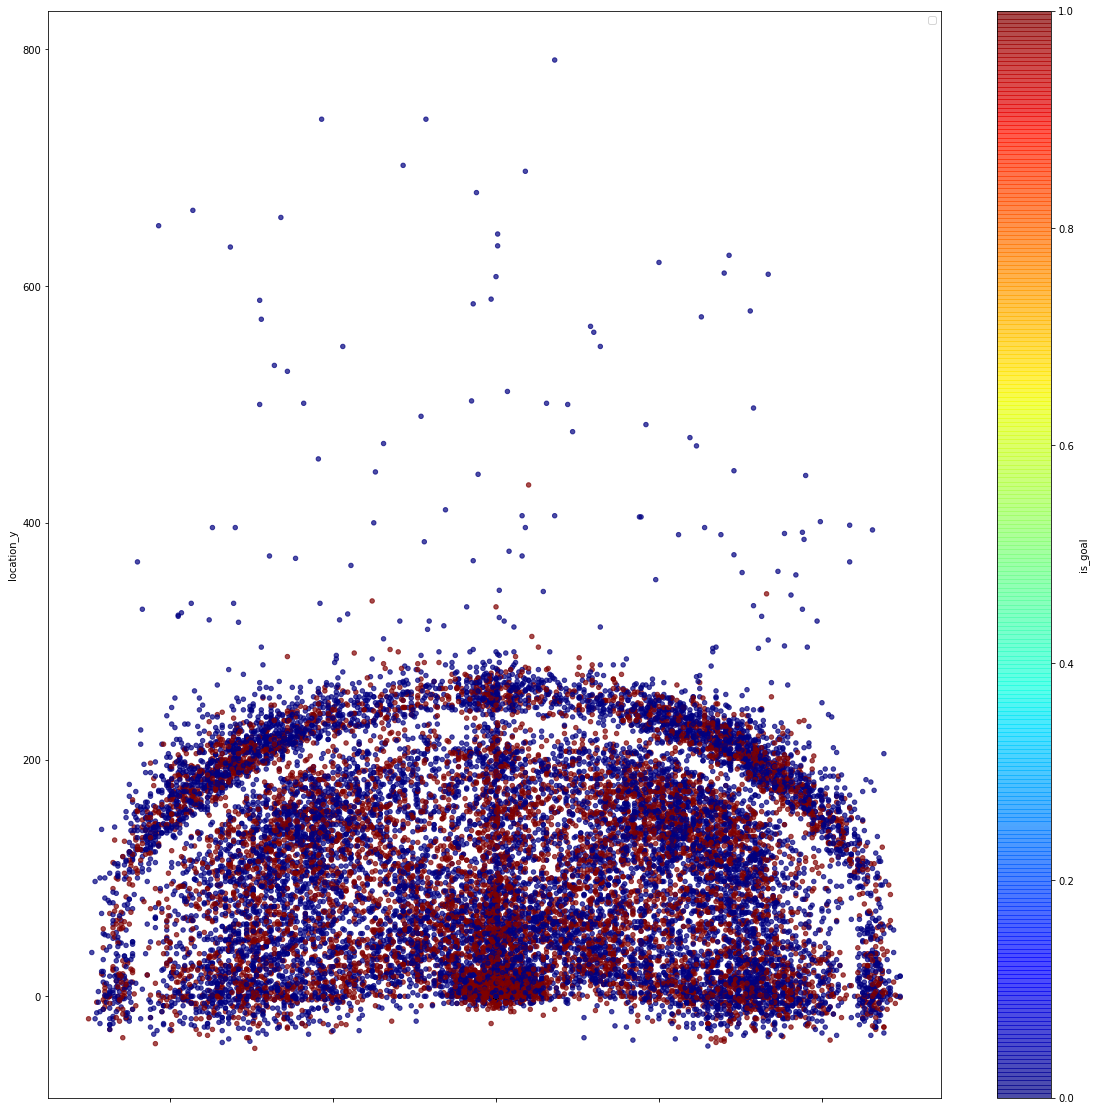

In [771]:
data1.plot(kind="scatter", x="location_x", y="location_y", alpha=0.7,figsize=(20,20), 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


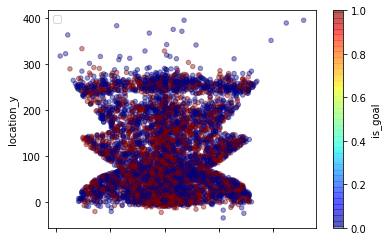

In [419]:
data1[data1['area_of_shot']=='Center(C)'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


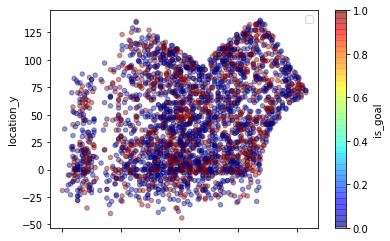

In [420]:
data1[data1['area_of_shot']=='Left Side(L)'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


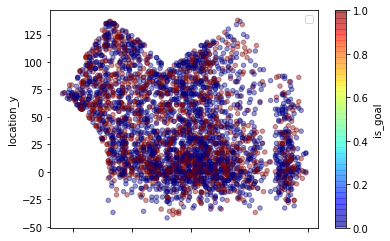

In [421]:
data1[data1['area_of_shot']=='Right Side(R)'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


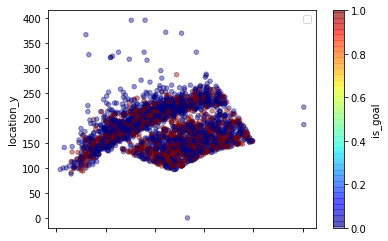

In [422]:
data1[data1['area_of_shot']=='Left Side Center(LC)'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


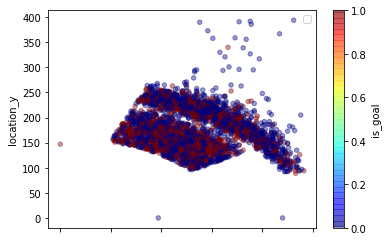

In [423]:
data1[data1['area_of_shot']=='Right Side Center(RC)'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


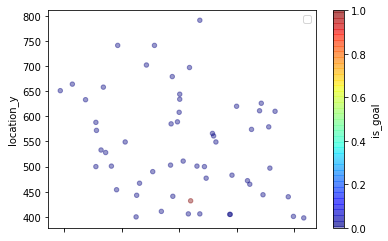

In [424]:
data1[data1['area_of_shot']=='Mid Ground(MG)'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


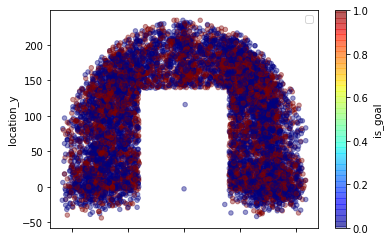

In [425]:
data1[data1['shot_basics']=='Mid Range'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


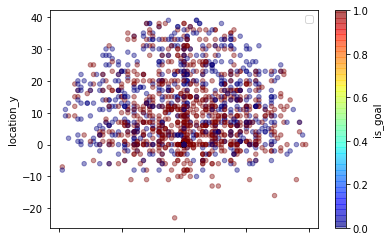

In [426]:
data1[data1['shot_basics']=='Goal Area'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


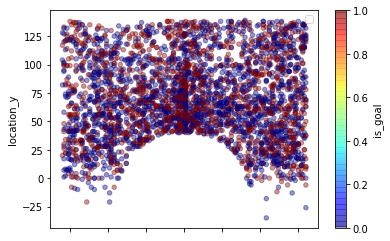

In [427]:
data1[data1['shot_basics']=='Goal Line'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


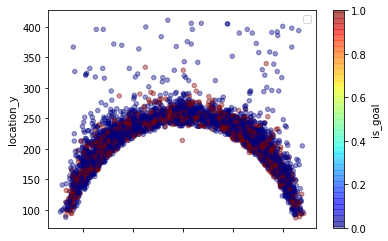

In [428]:
data1[data1['shot_basics']=='Penalty Spot'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


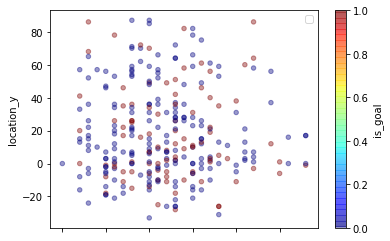

In [429]:
data1[data1['shot_basics']=='Right Corner'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


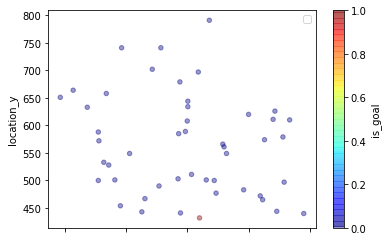

In [430]:
data1[data1['shot_basics']=='Mid Ground Line'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


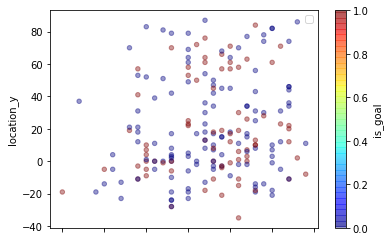

In [431]:
data1[data1['shot_basics']=='Left Corner'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


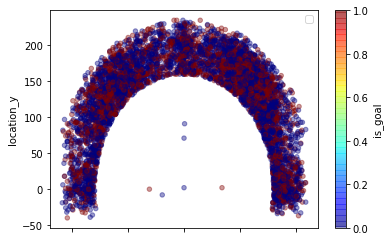

In [432]:
data1[data1['range_of_shot']=='16-24 ft.'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


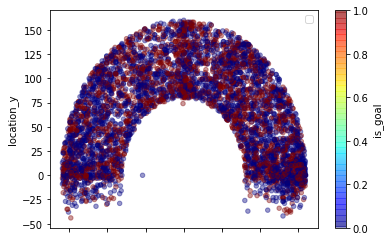

In [433]:
data1[data1['range_of_shot']=='8-16 ft.'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4, 
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


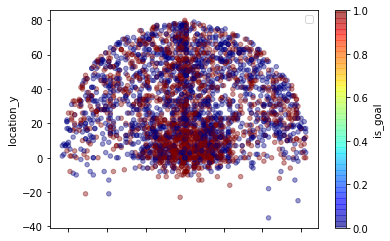

In [434]:
data1[data1['range_of_shot']=='Less Than 8 ft.'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4,
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


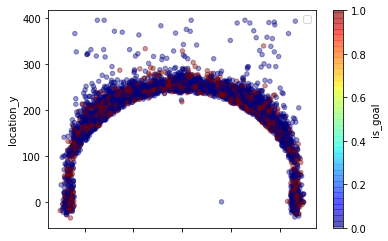

In [435]:
data1[data1['range_of_shot']=='24+ ft.'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4,
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


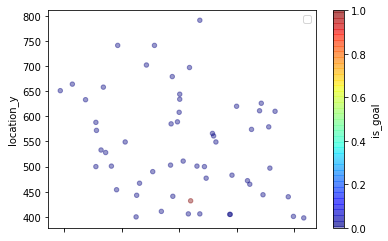

In [436]:
data1[data1['range_of_shot']=='Back Court Shot'].plot(kind="scatter", x="location_x", y="location_y", alpha=0.4,
c="is_goal", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [437]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 19 columns):
shot_id_number      30697 non-null int64
match_event_id      29134 non-null float64
location_x          29236 non-null float64
location_y          29157 non-null float64
remaining_min       30314 non-null float64
power_of_shot       30340 non-null float64
knockout_match      30697 non-null float64
game_season         30693 non-null object
remaining_sec       30364 non-null float64
distance_of_shot    30576 non-null float64
is_goal             24429 non-null float64
area_of_shot        30697 non-null object
shot_basics         30697 non-null object
range_of_shot       30697 non-null object
date_of_game        30696 non-null object
home/away           30697 non-null object
lat/lng             30697 non-null object
type_of_shot        30697 non-null object
match_id            30697 non-null int64
dtypes: float64(9), int64(2), object(8)
memory usage: 4.4+ MB


In [448]:
data1[data1['game_season'].isnull()].loc['game_season']='1996-97'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [463]:
data1.loc[data1['match_id']==29600072,'game_season']='1996-97'

In [467]:
data1.loc[data1['match_id']==29600813,'game_season']='1996-97'

In [468]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 19 columns):
shot_id_number      30697 non-null int64
match_event_id      29134 non-null float64
location_x          29236 non-null float64
location_y          29157 non-null float64
remaining_min       30314 non-null float64
power_of_shot       30340 non-null float64
knockout_match      30697 non-null float64
game_season         30697 non-null object
remaining_sec       30364 non-null float64
distance_of_shot    30576 non-null float64
is_goal             24429 non-null float64
area_of_shot        30697 non-null object
shot_basics         30697 non-null object
range_of_shot       30697 non-null object
date_of_game        30696 non-null object
home/away           30697 non-null object
lat/lng             30697 non-null object
type_of_shot        30697 non-null object
match_id            30697 non-null int64
dtypes: float64(9), int64(2), object(8)
memory usage: 4.4+ MB


In [473]:
data1.corr() 

,shot_id_number,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,match_id
shot_id_number,1.000000,0.031239,-0.020904,0.031881,-0.005241,0.000333,0.612571,-0.004939,0.014134,-0.012693,0.761656
match_event_id,0.031239,1.000000,-0.030212,0.059463,-0.273415,0.955894,-0.001157,-0.020157,0.056262,-0.038705,0.000789
location_x,-0.020904,-0.030212,1.000000,-0.014907,0.007627,-0.026894,-0.013557,0.001459,0.025050,-0.004728,-0.020021
location_y,0.031881,0.059463,-0.014907,1.000000,-0.072674,0.040771,0.001000,-0.050202,0.769908,-0.145413,-0.013659
remaining_min,-0.005241,-0.273415,0.007627,-0.072674,1.000000,-0.044592,0.014338,0.027509,-0.058397,0.027207,0.014357
power_of_shot,0.000333,0.955894,-0.026894,0.040771,-0.044592,1.000000,0.008950,0.005788,0.043023,-0.033197,0.010027
knockout_match,0.612571,-0.001157,-0.013557,0.001000,0.014338,0.008950,1.000000,-0.001688,-0.005290,0.000192,0.917235
remaining_sec,-0.004939,-0.020157,0.001459,-0.050202,0.027509,0.005788,-0.001688,1.000000,-0.049134,0.031086,-0.006099
distance_of_shot,0.014134,0.056262,0.025050,0.769908,-0.058397,0.043023,-0.005290,-0.049134,1.000000,-0.186214,-0.026313
is_goal,-0.012693,-0.038705,-0.004728,-0.145413,0.027207,-0.033197,0.000192,0.031086,-0.186214,1.000000,-0.000169


In [535]:
data2=data1.copy()

In [536]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data2['area_of_shot'] = ordinal_encoder.fit_transform(data2[['area_of_shot']])

In [537]:
ordinal_encoder = OrdinalEncoder()
data2['shot_basics'] = ordinal_encoder.fit_transform(data2[['shot_basics']])

In [538]:
ordinal_encoder = OrdinalEncoder()
data2['range_of_shot'] = ordinal_encoder.fit_transform(data2[['range_of_shot']])

In [539]:
data2[['distance_of_shot','range_of_shot','area_of_shot','shot_basics']].corr(method='pearson')

,distance_of_shot,range_of_shot,area_of_shot,shot_basics
distance_of_shot,1.000000,-0.776536,0.433175,0.841550
range_of_shot,-0.776536,1.000000,-0.533307,-0.843722
area_of_shot,0.433175,-0.533307,1.000000,0.576749
shot_basics,0.841550,-0.843722,0.576749,1.000000


In [540]:
data2['distance_of_shot'] = data2.groupby(['shot_basics'], sort=False)['distance_of_shot'].apply(lambda x: x.fillna(x.mean()))


In [542]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 19 columns):
shot_id_number      30697 non-null int64
match_event_id      29134 non-null float64
location_x          29236 non-null float64
location_y          29157 non-null float64
remaining_min       30314 non-null float64
power_of_shot       30340 non-null float64
knockout_match      30697 non-null float64
game_season         30697 non-null object
remaining_sec       30364 non-null float64
distance_of_shot    30697 non-null float64
is_goal             24429 non-null float64
area_of_shot        30697 non-null float64
shot_basics         30697 non-null float64
range_of_shot       30697 non-null float64
date_of_game        30696 non-null object
home/away           30697 non-null object
lat/lng             30697 non-null object
type_of_shot        30697 non-null object
match_id            30697 non-null int64
dtypes: float64(12), int64(2), object(5)
memory usage: 4.4+ MB


In [543]:
data2.corr()

,shot_id_number,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,match_id
shot_id_number,1.000000,0.031239,-0.020904,0.031881,-0.005241,0.000333,0.612571,-0.004939,0.014166,-0.012693,-0.020633,0.008791,0.011059,0.761656
match_event_id,0.031239,1.000000,-0.030212,0.059463,-0.273415,0.955894,-0.001157,-0.020157,0.056060,-0.038705,-0.016466,0.041406,-0.013696,0.000789
location_x,-0.020904,-0.030212,1.000000,-0.014907,0.007627,-0.026894,-0.013557,0.001459,0.025249,-0.004728,0.581112,0.077699,-0.042204,-0.020021
location_y,0.031881,0.059463,-0.014907,1.000000,-0.072674,0.040771,0.001000,-0.050202,0.769481,-0.145413,0.113732,0.643496,-0.605654,-0.013659
remaining_min,-0.005241,-0.273415,0.007627,-0.072674,1.000000,-0.044592,0.014338,0.027509,-0.058364,0.027207,0.014281,-0.021600,-0.015924,0.014357
power_of_shot,0.000333,0.955894,-0.026894,0.040771,-0.044592,1.000000,0.008950,0.005788,0.042759,-0.033197,-0.011856,0.038115,-0.020058,0.010027
knockout_match,0.612571,-0.001157,-0.013557,0.001000,0.014338,0.008950,1.000000,-0.001688,-0.005383,0.000192,-0.016383,-0.008777,0.009067,0.917235
remaining_sec,-0.004939,-0.020157,0.001459,-0.050202,0.027509,0.005788,-0.001688,1.000000,-0.049009,0.031086,-0.006253,-0.023129,0.012585,-0.006099
distance_of_shot,0.014166,0.056060,0.025249,0.769481,-0.058364,0.042759,-0.005383,-0.049009,1.000000,-0.186337,0.433445,0.841896,-0.776424,-0.026314
is_goal,-0.012693,-0.038705,-0.004728,-0.145413,0.027207,-0.033197,0.000192,0.031086,-0.186337,1.000000,-0.105288,-0.186155,0.158315,-0.000169


In [530]:
data2.describe()

,shot_id_number,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,match_id
count,30697.000000,29134.000000,29236.000000,29157.000000,30314.000000,30340.000000,30697.000000,30364.000000,30697.000000,24429.000000,30697.000000,30697.000000,30697.000000,3.069700e+04
mean,15349.000000,249.576028,7.383876,91.126933,4.882200,2.519150,0.146562,28.402504,33.653373,0.445331,1.752484,2.807669,1.869173,2.476407e+07
std,8861.604943,150.186019,110.263049,87.676395,3.450802,1.153271,0.353674,17.480600,9.856564,0.497013,1.947775,1.980344,1.580609,7.755175e+06
min,1.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,9.400000,0.000000,0.000000,0.000000,0.000000,2.000001e+07
25%,7675.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,0.000000,1.000000,0.000000,2.050008e+07
50%,15349.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,1.000000,4.000000,2.000000,2.090035e+07
75%,23023.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,4.000000,4.000000,4.000000,2.960047e+07
max,30697.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,5.000000,6.000000,4.000000,4.990009e+07


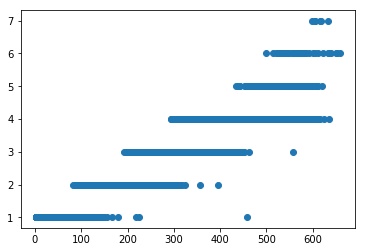

In [544]:
plt.scatter(data2['match_event_id'],data2['power_of_shot'])

In [558]:
data3 = data2[['power_of_shot', 'match_event_id', 'shot_id_number']]

In [564]:
data3 = data3[pd.notnull(data3['match_event_id'])]


In [566]:
data3

,power_of_shot,match_event_id,shot_id_number
0,1.0,10.0,1
1,1.0,12.0,2
2,1.0,35.0,3
3,1.0,43.0,4
4,2.0,155.0,5
5,3.0,244.0,6
6,3.0,251.0,7
7,3.0,254.0,8
8,3.0,265.0,9
9,3.0,294.0,10


In [567]:
test3 = data3[data3['power_of_shot'].isnull()]
train3 = data3[data3['power_of_shot'].notnull()]

In [568]:
train3

,power_of_shot,match_event_id,shot_id_number
0,1.0,10.0,1
1,1.0,12.0,2
2,1.0,35.0,3
3,1.0,43.0,4
4,2.0,155.0,5
5,3.0,244.0,6
6,3.0,251.0,7
7,3.0,254.0,8
8,3.0,265.0,9
9,3.0,294.0,10


In [569]:
from sklearn import linear_model as lm
mlr = lm.LinearRegression()

In [572]:
mlr.fit(train3.drop(columns=['power_of_shot', 'shot_id_number']), train3['power_of_shot'])
pred3 = mlr.predict(test3[['match_event_id']])

In [576]:
pred3_1 = np.round_(pred3, decimals=0)

In [581]:
pred3_1=pred3_1.astype(int)


In [586]:
len(pred3_1)

339

In [587]:
test3['power_of_shot'] = pred3_1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [589]:
data1.loc[data1['shot_id_number'].isin(test3['shot_id_number']), ['power_of_shot']] = test3[['power_of_shot']]

In [594]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 19 columns):
shot_id_number      30697 non-null int64
match_event_id      29134 non-null float64
location_x          29236 non-null float64
location_y          29157 non-null float64
remaining_min       30314 non-null float64
power_of_shot       30679 non-null float64
knockout_match      30697 non-null float64
game_season         30697 non-null object
remaining_sec       30364 non-null float64
distance_of_shot    30576 non-null float64
is_goal             24429 non-null float64
area_of_shot        30697 non-null object
shot_basics         30697 non-null object
range_of_shot       30697 non-null object
date_of_game        30696 non-null object
home/away           30697 non-null object
lat/lng             30697 non-null object
type_of_shot        30697 non-null object
match_id            30697 non-null int64
dtypes: float64(9), int64(2), object(8)
memory usage: 4.4+ MB


In [595]:
from sklearn.impute import SimpleImputer

In [608]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [609]:
data1[['remaining_min', 'remaining_sec']] = imp_mean.fit_transform(data1[['remaining_min', 'remaining_sec']])

In [610]:
data1[['power_of_shot']] = imp_mode.fit_transform(data1[['power_of_shot']])

In [635]:
data2=data1.copy()

In [642]:
ordinal_encoder = OrdinalEncoder()
data2['shot_basics'] = ordinal_encoder.fit_transform(data2[['shot_basics']])

In [613]:
data1.describe()

,shot_id_number,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,match_id
count,30697.000000,29134.000000,29236.000000,29157.000000,30697.000000,30697.000000,30697.000000,30697.000000,30576.000000,24429.000000,3.069700e+04
mean,15349.000000,249.576028,7.383876,91.126933,4.882200,2.519367,0.146562,28.402504,33.652673,0.445331,2.476407e+07
std,8861.604943,150.186019,110.263049,87.676395,3.429207,1.152819,0.353674,17.385524,9.862220,0.497013,7.755175e+06
min,1.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,9.400000,0.000000,2.000001e+07
25%,7675.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,2.050008e+07
50%,15349.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.402504,35.000000,0.000000,2.090035e+07
75%,23023.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,2.960047e+07
max,30697.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,4.990009e+07


In [643]:
data3 = data2[['shot_basics', 'distance_of_shot', 'shot_id_number']]


In [646]:
test3 = data3[data3['distance_of_shot'].isnull()]
train3 = data3[data3['distance_of_shot'].notnull()]

In [648]:
mlr = lm.LinearRegression()
mlr.fit(train3.drop(columns=['distance_of_shot', 'shot_id_number']), train3['distance_of_shot'])
pred3 = mlr.predict(test3[['shot_basics']])

In [650]:
pred3_1 = np.round_(pred3, decimals=0)
pred3_1=pred3_1.astype(int)
test3['distance_of_shot'] = pred3_1
data1.loc[data1['shot_id_number'].isin(test3['shot_id_number']), ['distance_of_shot']] = test3[['distance_of_shot']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [653]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 19 columns):
shot_id_number      30697 non-null int64
match_event_id      29134 non-null float64
location_x          29236 non-null float64
location_y          29157 non-null float64
remaining_min       30697 non-null float64
power_of_shot       30697 non-null float64
knockout_match      30697 non-null float64
game_season         30697 non-null object
remaining_sec       30697 non-null float64
distance_of_shot    30697 non-null float64
is_goal             24429 non-null float64
area_of_shot        30697 non-null object
shot_basics         30697 non-null object
range_of_shot       30697 non-null object
date_of_game        30696 non-null object
home/away           30697 non-null object
lat/lng             30697 non-null object
type_of_shot        30697 non-null object
match_id            30697 non-null int64
dtypes: float64(9), int64(2), object(8)
memory usage: 4.4+ MB


In [732]:
data1.describe()

,shot_id_number,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,match_id
count,30697.000000,29134.000000,29236.000000,29157.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,24429.000000,3.069700e+04
mean,15349.000000,249.576028,7.383876,91.126933,4.882200,2.519367,0.146562,28.402504,33.654954,0.445331,2.476407e+07
std,8861.604943,150.186019,110.263049,87.676395,3.429207,1.152819,0.353674,17.385524,9.856519,0.497013,7.755175e+06
min,1.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,9.400000,0.000000,2.000001e+07
25%,7675.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,2.050008e+07
50%,15349.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.402504,35.000000,0.000000,2.090035e+07
75%,23023.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,2.960047e+07
max,30697.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,4.990009e+07


In [731]:
data1.describe()

,shot_id_number,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,date_of_game,home/away,lat/lng,type_of_shot,match_id
0,1,10.0,167.0,72.0,10.0000,1.0,0.0,2000-01,27.000000,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 30,20000012
1,2,12.0,-157.0,0.0,10.0000,1.0,0.0,2000-01,22.000000,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 45,20000012
2,3,35.0,-101.0,135.0,7.0000,1.0,0.0,2000-01,45.000000,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 25,20000012
3,4,43.0,138.0,175.0,6.0000,1.0,0.0,2000-01,52.000000,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 61,20000012
4,5,155.0,0.0,0.0,4.8822,2.0,0.0,2000-01,19.000000,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 59,20000012
5,6,244.0,-145.0,-11.0,9.0000,3.0,0.0,2000-01,32.000000,34.0,0.0,Left Side(L),Mid Range,8-16 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 17,20000012
6,7,251.0,0.0,0.0,8.0000,3.0,0.0,2000-01,52.000000,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 62,20000012
7,8,254.0,1.0,28.0,8.0000,3.0,0.0,2000-01,5.000000,22.0,NaN,Center(C),Goal Area,Less Than 8 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 61,20000012
8,9,265.0,-65.0,NaN,6.0000,3.0,0.0,2000-01,12.000000,32.0,1.0,Left Side(L),Goal Line,8-16 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 36,20000012
9,10,294.0,-33.0,NaN,3.0000,3.0,0.0,2000-01,36.000000,32.0,0.0,Center(C),Goal Line,8-16 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 44,20000012


In [750]:
data2=data1.copy()

In [751]:
data2[['remaining_min', 'power_of_shot','remaining_sec','distance_of_shot','match_id','location_x','location_y']] = scaler.fit_transform(data2[['remaining_min', 'power_of_shot','remaining_sec','distance_of_shot','match_id','location_x','location_y']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [752]:
data2=data2.drop(columns=['match_event_id'])

In [753]:
data2=data2.drop(columns=['date_of_game'])

In [754]:
data2

,shot_id_number,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,lat/lng,type_of_shot,match_id
0,1,1.447619,-0.218157,1.492440,-1.317979,0.0,2000-01,-8.067211e-02,0.440837,NaN,Right Side(R),Mid Range,16-24 ft.,MANU @ POR,"45.539131, -122.651648",shot - 30,-0.614316
1,2,-1.490859,-1.039373,1.492440,-1.317979,0.0,2000-01,-3.682724e-01,0.136465,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,"45.539131, -122.651648",shot - 45,-0.614316
2,3,-0.982974,0.500406,0.617587,-1.317979,0.0,2000-01,9.546889e-01,0.237922,1.0,Left Side Center(LC),Mid Range,16-24 ft.,MANU @ POR,"45.539131, -122.651648",shot - 25,-0.614316
3,4,1.184607,0.956637,0.325970,-1.317979,0.0,2000-01,1.357329e+00,0.846666,0.0,Right Side Center(RC),Mid Range,16-24 ft.,MANU @ POR,"45.539131, -122.651648",shot - 61,-0.614316
4,5,-0.066967,-1.039373,0.000000,-0.450526,0.0,2000-01,-5.408325e-01,-1.385395,1.0,Center(C),Goal Area,Less Than 8 ft.,MANU @ POR,"45.539131, -122.651648",shot - 59,-0.614316
5,6,-1.382027,-1.164837,1.200822,0.416927,0.0,2000-01,2.069282e-01,0.035007,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,"45.539131, -122.651648",shot - 17,-0.614316
6,7,-0.066967,-1.039373,0.909205,0.416927,0.0,2000-01,1.357329e+00,-1.385395,1.0,Center(C),Goal Area,Less Than 8 ft.,MANU @ POR,"45.539131, -122.651648",shot - 62,-0.614316
7,8,-0.057898,-0.720012,0.909205,0.416927,0.0,2000-01,-1.346113e+00,-1.182481,NaN,Center(C),Goal Area,Less Than 8 ft.,MANU @ POR,"45.539131, -122.651648",shot - 61,-0.614316
8,9,-0.656477,NaN,0.325970,0.416927,0.0,2000-01,-9.434729e-01,-0.167907,1.0,Left Side(L),Goal Line,8-16 ft.,MANU @ POR,"45.539131, -122.651648",shot - 36,-0.614316
9,10,-0.366257,NaN,-0.548882,0.416927,0.0,2000-01,4.370084e-01,-0.167907,0.0,Center(C),Goal Line,8-16 ft.,MANU @ POR,"45.539131, -122.651648",shot - 44,-0.614316


In [755]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [756]:
data2.loc[data2['home/away'].str.contains('vs.'), 'home/away'] = 1

In [757]:
data2.loc[data2['home/away'].str.contains('@',na=False), 'home/away'] = 0

In [758]:

data2 = pd.get_dummies(data2, columns=['area_of_shot','shot_basics','range_of_shot','lat/lng','type_of_shot','game_season'])


In [761]:
len(data2)

30697

In [762]:
data3=data2.copy()
data4=data2.copy()
data5=data2.copy()

In [763]:
data3=data3.drop(columns=['location_x','location_y'])

In [764]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [765]:
data4[['location_x','location_y']] = imp_mean.fit_transform(data4[['location_x','location_y']])
data5[['location_x','location_y']] = imp_mode.fit_transform(data5[['location_x','location_y']])

In [770]:
data2.shape

(30697, 150)

In [ ]:
reg = xgb(n_estimators=100,max_depth=3,seed=1729)


In [766]:
data2.to_csv('test2.csv')

In [767]:
data3.to_csv('xyremoved.csv')

In [768]:
data4.to_csv('xymean.csv')

In [769]:
data5.to_csv('xymode.csv')